## Practical work N2. Regression NN.  

### Table of Contents

1. [Chose data from data source
https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE](#1)
2. [Data set contains the observations about changes in 9 stock indexes. Chose any of stock
indexes as your dependent variable (y). The rest of indexes will be used as independent
variables (X).](#2)
3. [Calculate the paired Person correlations for all variables.](#3)
4. [Implement/call an algorithm for training a multilayer perceptron model to solve a
regression problem (sklearn.neural_network.MLPRegressor или tf.keras.Sequential)](#4)
5. [Implement/call an algorithm to train a regression decision tree
(sklearn.tree.DecisionTreeRegressor) OR linear regression model (sklearn.linear_model.
LinearRegression)](#5)
6. [Train algorithms on the training set and evaluate the performance on the test set.](#6)
7. [Display model parameters. Vector of weights (coefficients) and free term for NN. Tree
depth and number of leaves for the regression tree or coefficients for linear regression
model.](#7)
8. [Calculate and display the coefficient of multiple determination R2 for test and training
data sample.](#8)
9. [Compare the results.](#9)
10. [Create the report](#10)

### References
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
* https://www.kaggle.com/code/hendraherviawan/regression-with-kerasregressor/notebook
* https://www.delftstack.com/howto/python-pandas/pandas-convert-object-to-float/
* https://keras.io/api/models/sequential/

In [238]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 <a class="anchor" id="1"></a>
### 1. Chose data from data source https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE

In [379]:
dataset = pd.read_excel('data/data_akbilgic.xlsx')

/home/amoel/anaconda3/envs/udacitycvenv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [380]:
dataset.head()

,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.035754,0.038376,-0.004679,0.002193,0.003894,0,0.03119,0.012698,0.028524
2,2009-01-06 00:00:00,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773
3,2009-01-07 00:00:00,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
4,2009-01-08 00:00:00,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424


The excel file has a header and a subheader. Lets set the subheader values as the column names

In [381]:
dataset.columns = dataset.iloc[0]

In [382]:
dataset.head()

,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.035754,0.038376,-0.004679,0.002193,0.003894,0,0.03119,0.012698,0.028524
2,2009-01-06 00:00:00,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773
3,2009-01-07 00:00:00,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
4,2009-01-08 00:00:00,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424


And we'll delete the first row, because they are just the column names

In [383]:
dataset = dataset[1:]

In [384]:
dataset.head()

,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.035754,0.038376,-0.004679,0.002193,0.003894,0,0.03119,0.012698,0.028524
2,2009-01-06 00:00:00,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773
3,2009-01-07 00:00:00,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
4,2009-01-08 00:00:00,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
5,2009-01-09 00:00:00,0.00986,0.009658,-0.021533,-0.019873,-0.01271,-0.004474,-0.009764,-0.010989,-0.007802


#### Check for missing values

In [385]:
dataset.isnull().sum()

0
date       0
ISE        0
ISE        0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64

There are no nulls in the dataset

#### Convert the DataFrame to float

In [387]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 1 to 536
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     536 non-null    object
 1   ISE      536 non-null    object
 2   ISE      536 non-null    object
 3   SP       536 non-null    object
 4   DAX      536 non-null    object
 5   FTSE     536 non-null    object
 6   NIKKEI   536 non-null    object
 7   BOVESPA  536 non-null    object
 8   EU       536 non-null    object
 9   EM       536 non-null    object
dtypes: object(10)
memory usage: 42.0+ KB


All the columns are of the Dtype 'object'. To calulate the Pearson correlation, we have to convert them to a  numerical datatype. We can remove the date column as we will not be using it for the regression

In [389]:
dataset = dataset.iloc[:,1:]

In [390]:
dataset = dataset.astype('float32', errors='raise')

In [391]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 1 to 536
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ISE      536 non-null    float32
 1   ISE      536 non-null    float32
 2   SP       536 non-null    float32
 3   DAX      536 non-null    float32
 4   FTSE     536 non-null    float32
 5   NIKKEI   536 non-null    float32
 6   BOVESPA  536 non-null    float32
 7   EU       536 non-null    float32
 8   EM       536 non-null    float32
dtypes: float32(9)
memory usage: 19.0 KB


The dataset is successfully loaded into a pandas DataFrame

 <a class="anchor" id="2"></a>
### 2. Data set contains the observations about changes in 9 stock indexes. Chose any of stock indexes as your dependent variable (y). The rest of indexes will be used as independent variables (X).

We'll use EU as the dependent variable.
'ISE', 'ISE', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA' and 'EM' will be the independent variables.

In [392]:
dataset.columns

Index(['ISE', 'ISE', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object', name=0)

Note that the first two columns have the same name. This could cause problems. We will reassign the first two column names to ISE1 and ISE2

In [393]:
dataset.columns = ['ISE1', 'ISE2', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']

In [394]:
dataset.columns

Index(['ISE1', 'ISE2', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')

In [395]:
X = dataset.drop('EU', axis=1)
y = dataset['EU']

#### Independent variables

In [403]:
X.head() 

,ISE1,ISE2,SP,DAX,FTSE,NIKKEI,BOVESPA,EM
1,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.028524
2,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.008773
3,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.020015
4,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.019424
5,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.007802


#### Dependent variable

In [404]:
y.head()

1    0.012698
2    0.011341
3   -0.017073
4   -0.005561
5   -0.010989
Name: EU, dtype: float32

#### Convert X and y to numpy arrays

In [439]:
X = X.to_numpy()
y = y.to_numpy()

In [440]:
X.shape, y.shape

((536, 8), (536,))

<a class="anchor" id="3"></a>
### 3. Calculate the paired Person correlations for all variables.

In [441]:
dataset.corr()

,ISE1,ISE2,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
ISE1,1.000000,0.942897,0.439489,0.602081,0.622948,0.260052,0.432898,0.655519,0.600295
ISE2,0.942897,1.000000,0.449561,0.629218,0.648740,0.393225,0.446889,0.690761,0.701954
SP,0.439489,0.449561,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.602081,0.629218,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.622948,0.648740,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.260052,0.393225,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.432898,0.446889,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.655519,0.690761,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.600295,0.701954,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


#### Heatmap of the correlations

<AxesSubplot:>

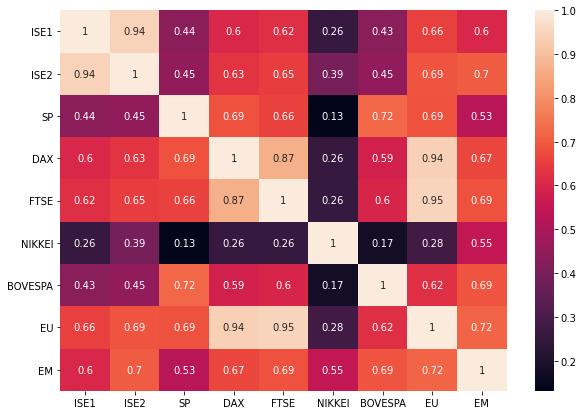

In [442]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(), annot=True)

Most of the columns seem to have some amount of correlation with each other, except maybe for NIKKEI

#### Visualize the distirbutions and correlations of all the columns

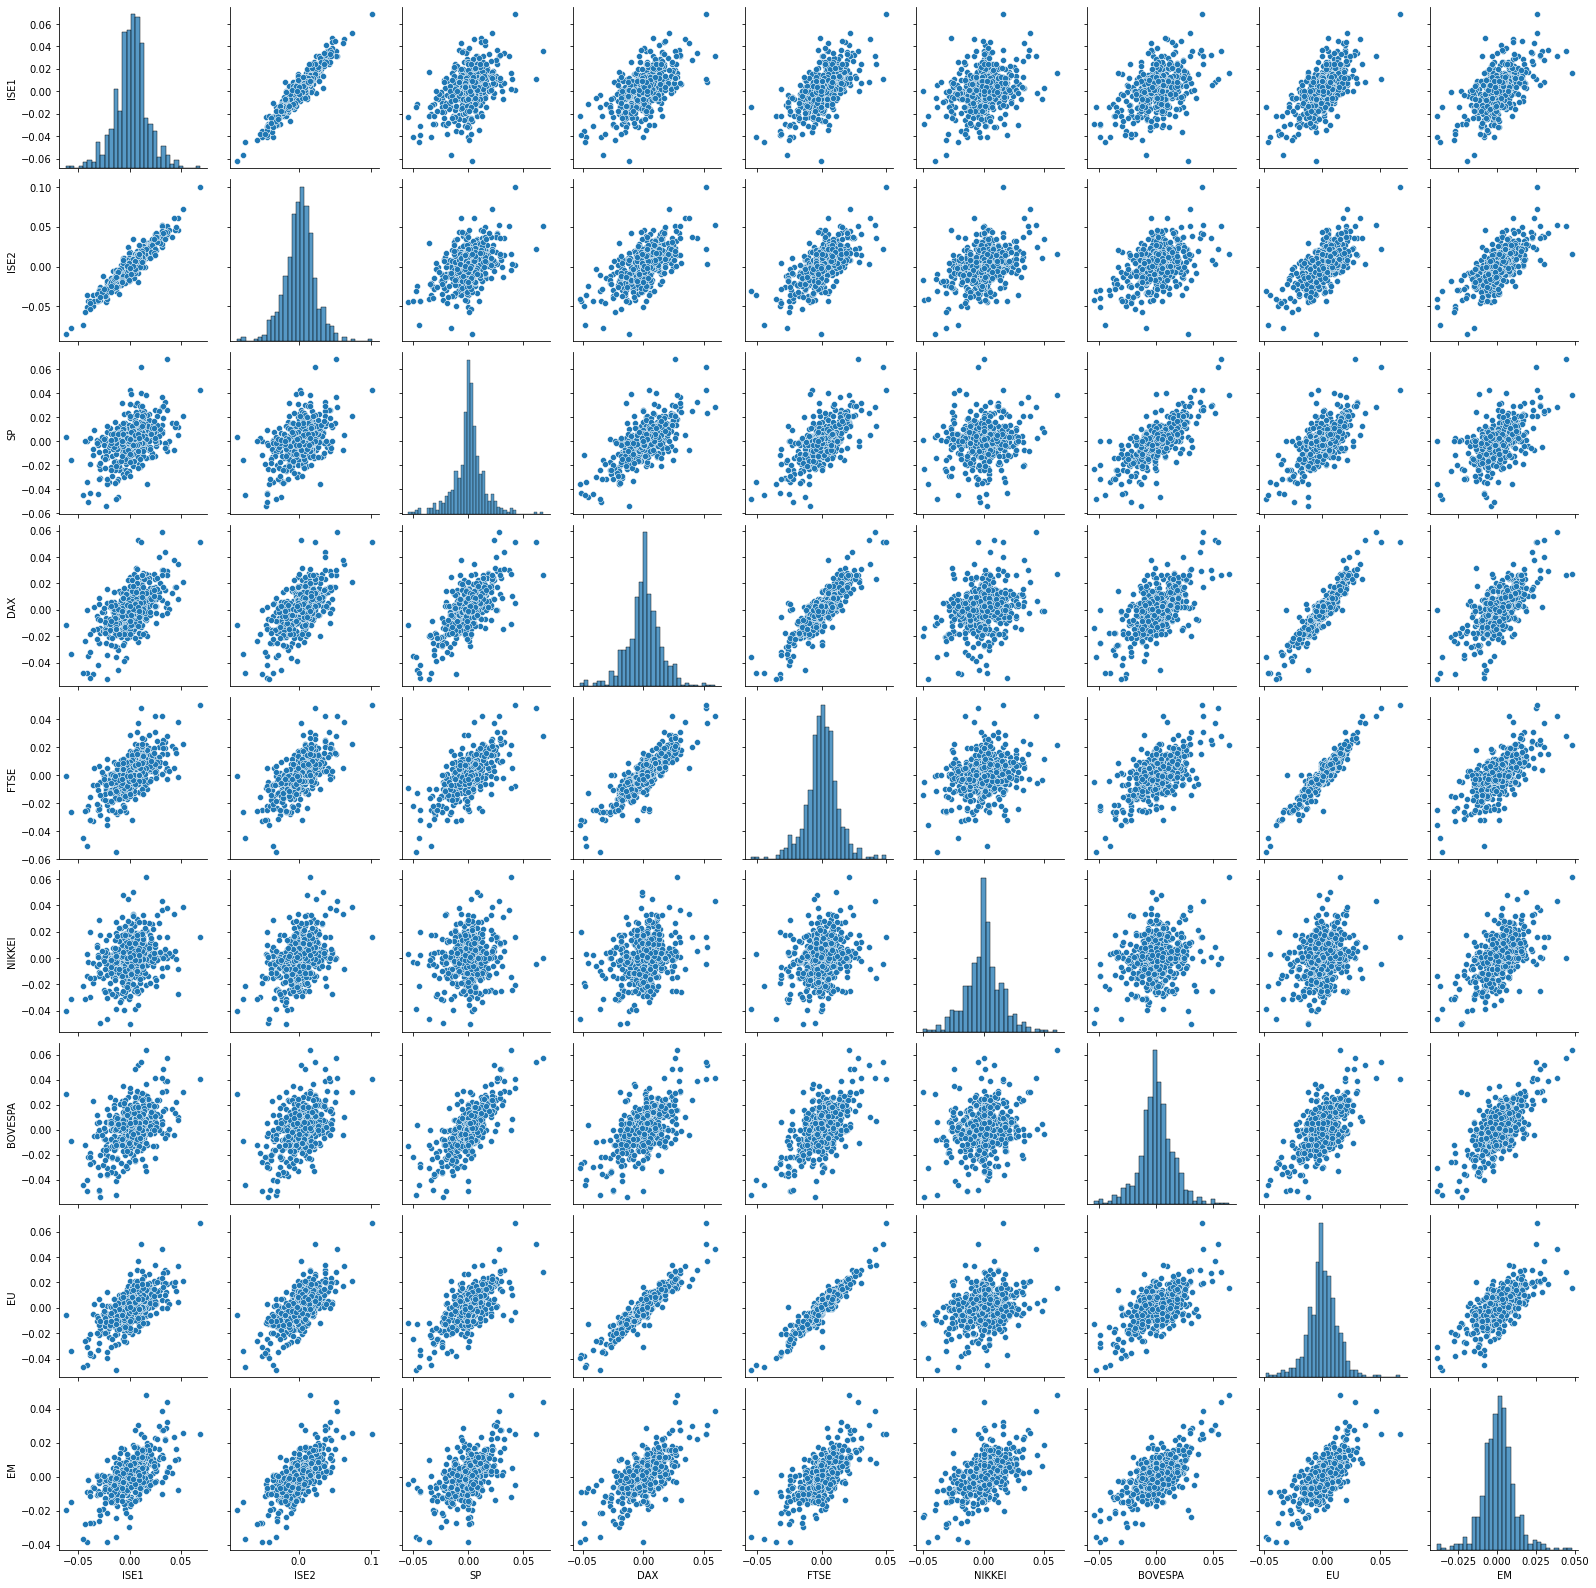

In [258]:
sns.pairplot(dataset)

<a class="anchor" id="4"></a>
### 4. Implement/call an algorithm for training a multilayer perceptron model to solve a regression problem (sklearn.neural_network.MLPRegressor или tf.keras.Sequential)

In [443]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold

#### Split the data into train and test sets

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [445]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((428, 8), (108, 8), (428,), (108,))

#### Create the model and train it

In [446]:
def baseline_model():
    model = Sequential()
    model.add(Dense(5, input_dim=8, kernel_initializer='normal', activation='relu')) 
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [447]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=1)

In [448]:
kfold = KFold(n_splits=2)

In [450]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold, error_score='raise')

Epoch 1/100
43/43 [==============================] - 1s 3ms/step - loss: 1.8084e-04
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 1.6635e-04
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 1.4013e-04
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 1.9595e-04
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 1.3439e-04
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 1.5752e-04
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 1.6470e-04
Epoch 8/100
43/43 [==============================] - 0s 4ms/step - loss: 2.0326e-04
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 1.8199e-04
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 1.7947e-04
Epoch 11/100
43/43 [==============================] - 0s 2ms/step - loss: 2.5313e-04
Epoch 12/100
43/43 [==============================] - 0s 3ms/step - loss: 

Epoch 97/100
43/43 [==============================] - 0s 4ms/step - loss: 1.4543e-04
Epoch 98/100
43/43 [==============================] - 0s 5ms/step - loss: 1.5822e-04
Epoch 99/100
43/43 [==============================] - 0s 6ms/step - loss: 1.3609e-04
Epoch 100/100
43/43 [==============================] - 0s 3ms/step - loss: 1.4869e-04
Epoch 1/100
43/43 [==============================] - 1s 4ms/step - loss: 1.4375e-04
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 1.7366e-04
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 1.5459e-04
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 1.6355e-04
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 1.3084e-04
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 1.6582e-04
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 1.3251e-04
Epoch 8/100
43/43 [==============================] - 0s 5ms/step - loss

In [451]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.00 (0.00) MSE


Since the MSE on the cross validation data is very low, we can conclude that the estimator performs well. So we can fit the estimator to X_train and y_train

In [452]:
results

array([-0.00014869, -0.00017494])

In [498]:
estimator.fit(X_train, y_train)

Epoch 1/100
86/86 [==============================] - 1s 4ms/step - loss: 1.4707e-04
Epoch 2/100
86/86 [==============================] - 1s 8ms/step - loss: 1.7322e-04
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 1.6075e-04
Epoch 4/100
86/86 [==============================] - 0s 4ms/step - loss: 1.5700e-04
Epoch 5/100
86/86 [==============================] - 0s 4ms/step - loss: 1.6300e-04
Epoch 6/100
86/86 [==============================] - 0s 4ms/step - loss: 1.5193e-04
Epoch 7/100
86/86 [==============================] - 0s 4ms/step - loss: 1.5575e-04
Epoch 8/100
86/86 [==============================] - 0s 4ms/step - loss: 1.6940e-04
Epoch 9/100
86/86 [==============================] - 0s 3ms/step - loss: 1.6317e-04
Epoch 10/100
86/86 [==============================] - 0s 4ms/step - loss: 1.4232e-04
Epoch 11/100
86/86 [==============================] - 0s 3ms/step - loss: 2.0453e-04
Epoch 12/100
86/86 [==============================] - 0s 3ms/step - loss: 

86/86 [==============================] - 0s 3ms/step - loss: 1.6521e-04
Epoch 98/100
86/86 [==============================] - 0s 3ms/step - loss: 1.4499e-04
Epoch 99/100
86/86 [==============================] - 0s 4ms/step - loss: 1.5027e-04
Epoch 100/100
86/86 [==============================] - 0s 5ms/step - loss: 1.6686e-04


<a class="anchor" id="5"></a>
### 5. Implement/call an algorithm to train a regression decision tree (sklearn.tree.DecisionTreeRegressor) OR linear regression model (sklearn.linear_model. LinearRegression)

In [453]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [454]:
lin_model = linear_model.LinearRegression()

In [466]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [467]:
lin_y_pred = lin_model.predict(X_test)

In [469]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, lin_y_pred))

Mean squared error: 0.00


In [470]:
# compare two values from the predictions and true values from the test set 
lin_y_pred[0], y_test[0]

(-0.027493391, -0.028450776)

We can see that the prediction is very close to the actual value

<a class="anchor" id="6"></a>
### 6. Train algorithms on the training set and evaluate the performance on the test set.

We have already trained both the models on the training set. Let's now evaluate the performance on the **test set**

#### Multilayer perceptron

In [499]:
nn_y_pred = estimator.predict(X_test)

22/22 [==============================] - 0s 2ms/step


In [500]:
print("Mean squared error for the neural network: %.2f" % mean_squared_error(y_test, nn_y_pred))

Mean squared error for the neural network: 0.00


#### Linear regression model

In [480]:
lin_y_pred = lin_model.predict(X_test)

In [481]:
print("Mean squared error for the linear model: %.2f" % mean_squared_error(y_test, lin_y_pred))

Mean squared error for the linear model: 0.00


In [482]:
print("Coefficient of determination: %.2f" % r2_score(y_test, lin_y_pred))

Coefficient of determination: 0.96


Looks like both models give a mean squared error of 0. Let's plot the predictions against the true values of the test set for both models

#### Plot the predicted values

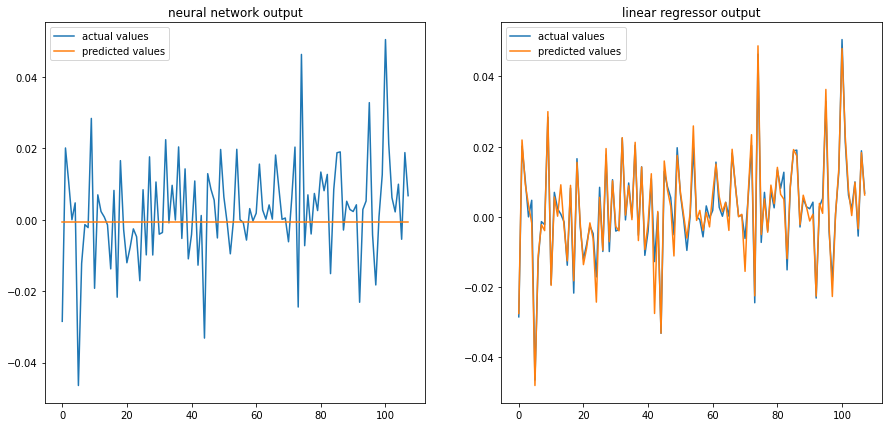

In [492]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(np.arange(len(y_test)), y_test, label='actual values')
plt.plot(np.arange(len(nn_y_pred)), nn_y_pred, label='predicted values')
plt.title('neural network output')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(len(y_test)), y_test, label='actual values')
plt.plot(np.arange(len(lin_y_pred)), lin_y_pred, label='predicted values')
plt.title('linear regressor output')
plt.legend()

plt.show()

As shown above, even though the mean square error is 0 for both models, we can see that the predctions from the neural network is much worse than the predictions from the linear regression model. This could be because the neural network is massively overfitting the training set

<a class="anchor" id="7"></a>
### 7. Display model parameters. Vector of weights (coefficients) and free term for NN. Tree depth and number of leaves for the regression tree or coefficients for linear regression model.

#### Parameters of the neural network

In [502]:
for i,layer in enumerate(estimator.model.layers):
    print(f'Weights of layer {i+1}')
    print(layer.weights)
    print()

Weights of layer 1
[<tf.Variable 'dense_79/kernel:0' shape=(8, 5) dtype=float32, numpy=
array([[-0.04087419, -0.03390153,  0.05526427, -0.01144974, -0.0618869 ],
       [-0.01537835,  0.02405971,  0.01468082, -0.02522057,  0.05807047],
       [-0.00127003,  0.02290278, -0.00845002,  0.06751395, -0.0912348 ],
       [-0.00268979,  0.00202611,  0.00817952,  0.05849874, -0.00643805],
       [-0.0126471 ,  0.11956255, -0.03386792, -0.01132577, -0.00707102],
       [ 0.04393123,  0.04093827, -0.00458872,  0.01716025,  0.0286158 ],
       [-0.06174289,  0.11761527, -0.03547053, -0.09237897,  0.08037402],
       [ 0.03125606, -0.0432914 ,  0.00100054, -0.0342141 , -0.01831635]],
      dtype=float32)>, <tf.Variable 'dense_79/bias:0' shape=(5,) dtype=float32, numpy=
array([-0.00627748, -0.00152002, -0.00491192, -0.00624185, -0.00588014],
      dtype=float32)>]

Weights of layer 2
[<tf.Variable 'dense_80/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[-0.00782045, -0.00165014, -0.04469578, 

#### Parameters of the linear regression model

In [506]:
print('Coefficients of the linear model')
print(lin_model.coef_)
print('\nIntercept of the linear model')
print(lin_model.intercept_)

Coefficients of the linear model
[-0.0398368   0.08075137  0.0219828   0.39569005  0.504528   -0.00764403
  0.01072559  0.01735441]

Intercept of the linear model
-0.00019744072


<a class="anchor" id="8"></a>
### 8. Calculate and display the coefficient of multiple determination R2 for test and training data sample.

In [507]:
lin_y_train_pred = lin_model.predict(X_train)
lin_y_test_pred = lin_model.predict(X_test)
print("Coefficient of determination for the training set: %.2f" % r2_score(y_train, lin_y_train_pred))
print("Coefficient of determination for the test set: %.2f" % r2_score(y_test, lin_y_test_pred))

Coefficient of determination for the training set: 0.96
Coefficient of determination for the test set: 0.96


The R square value of both training and test set are quite high (close to 1). This means that the regressor works well.

<a class="anchor" id="9"></a>
### 9. Compare the results.

#### Compare the predictions for the 1st test value

In [508]:
print('Actual value:', y_test[0])
print('Neural net prediction:', nn_y_pred[0])
print('Linear model prediction:', lin_y_pred[0])

Actual value: -0.028450776
Neural net prediction: 0.0017560842
Linear model prediction: -0.027493391


We can see that the output from the linear model is much closer to the actual value

#### Plot the predicted values

We'll plot the outputs once more

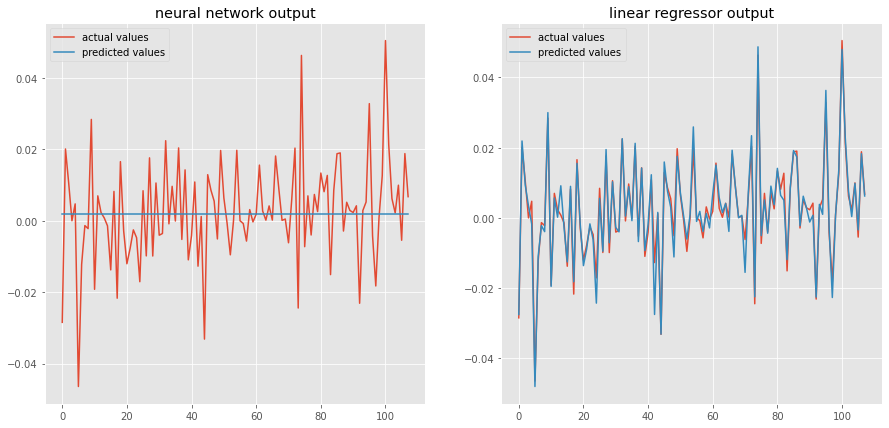

In [518]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(np.arange(len(y_test)), y_test, label='actual values')
plt.plot(np.arange(len(nn_y_pred)), nn_y_pred, label='predicted values')
plt.title('neural network output')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(len(y_test)), y_test, label='actual values')
plt.plot(np.arange(len(lin_y_pred)), lin_y_pred, label='predicted values')
plt.title('linear regressor output')
plt.legend()

plt.show()

As mentioned before, we can see that the linear regressor performs better. It's predicted values are much closer to the actual values. 
It is highly probable that the neural network is overfitting the training data, and thus is performing badly on the test set. 

The reasons for the neural network's overfitting might be the following:
* the number of data points is very small, and the model has too many parameters. i.e, the model is too complex for the dataset
* we ran the model for too many epochs (1oo epochs)

<a class="anchor" id="10"></a>
### 10. Conclusion

We can conclude that the linear regression model is better suited for this dataset. It is much simpler than the neural network with a far fewer number of parameters, and makes highly accurate predictions. The regression model has generalized the dataset well.   